In [1]:
import os
import matplotlib.pyplot as plt
import numpy as np
import cv2
import albumentations as A
# import mediapipe as mp
import torch
from torchvision import transforms
from PIL import Image
import timm
import random

/usr/local/lib/python3.11/dist-packages/albumentations/__init__.py:28: UserWarning: A new version of Albumentations is available: '2.0.7' (you have '2.0.5'). Upgrade using: pip install -U albumentations. To disable automatic update checks, set the environment variable NO_ALBUMENTATIONS_UPDATE to 1.
  check_for_updates()


In [2]:
!rm -rf /kaggle/working/*

In [3]:
source_dir  = '/kaggle/input/2000-hand-gestures'

In [4]:
source_dir2 = '/kaggle/input/rps-data-sample'

In [5]:
labels = os.listdir(os.path.join(source_dir,'images'))

In [6]:
os.listdir(os.path.join(source_dir2,'rps_data_sample'))

['paper', 'rock', 'scissors', 'none']

In [7]:
print(labels)

['fingerCircle', 'singleFingerBend', 'multiFingerBend', 'semiOpenPalm', 'semiOpenFist', 'openPalm', 'closedFist', 'fingerSymbols']


In [8]:
labels.remove('closedFist')

In [9]:
print(labels)

['fingerCircle', 'singleFingerBend', 'multiFingerBend', 'semiOpenPalm', 'semiOpenFist', 'openPalm', 'fingerSymbols']


In [10]:
images = {}
for label in labels:
    path = os.listdir(os.path.join(source_dir,'images',label))
    images[label] = path

In [11]:
labels2 = (os.listdir(os.path.join(source_dir2,'rps_data_sample')))
labels2.remove('none')
print(labels2)

['paper', 'rock', 'scissors']


In [12]:
for label in labels2:
    path = os.listdir(os.path.join(source_dir2,'rps_data_sample',label))
    images[label] = path

In [13]:
len(images.keys())

10

In [14]:
# print(images)

In [15]:
len(images)

10

In [16]:
type(images[labels[1]][15])

str

In [17]:
img_path = os.path.join(source_dir,'images',labels[1],images[labels[1]][15])
img = cv2.imread(img_path, cv2.IMREAD_COLOR_RGB)

In [18]:
display(img)

array([[[208, 203, 199],
        [208, 203, 199],
        [208, 203, 199],
        ...,
        [186, 179, 173],
        [186, 179, 173],
        [186, 179, 173]],

       [[208, 203, 199],
        [208, 203, 199],
        [208, 203, 199],
        ...,
        [186, 179, 173],
        [186, 179, 173],
        [186, 179, 173]],

       [[208, 203, 199],
        [208, 203, 199],
        [208, 203, 199],
        ...,
        [186, 179, 173],
        [186, 179, 173],
        [186, 179, 173]],

       ...,

       [[201, 197, 194],
        [201, 197, 194],
        [201, 197, 194],
        ...,
        [185, 180, 176],
        [185, 180, 176],
        [185, 180, 176]],

       [[201, 197, 194],
        [201, 197, 194],
        [201, 197, 194],
        ...,
        [185, 180, 176],
        [185, 180, 176],
        [185, 180, 176]],

       [[201, 197, 194],
        [201, 197, 194],
        [201, 197, 194],
        ...,
        [185, 180, 176],
        [185, 180, 176],
        [185, 180, 176]]

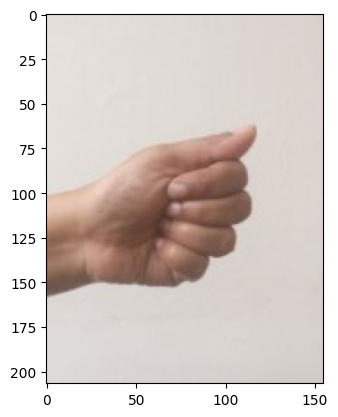

In [19]:
img2 = cv2.imread('/kaggle/input/2000-hand-gestures/images/closedFist/IMG_20220430_180538.jpg',cv2.IMREAD_COLOR_RGB)
plt.imshow(img2)

In [20]:
type(img)

numpy.ndarray

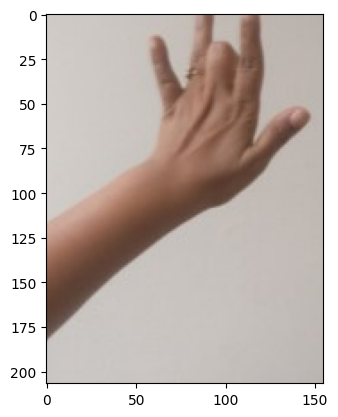

In [21]:
plt.imshow(img)

In [22]:
loaded_image = {}

In [23]:
for label in labels:
    loaded_image[label] = []

In [24]:
for label in labels:
    for img_path in images[label]:
        img = cv2.imread(os.path.join(source_dir,'images',label,img_path),cv2.IMREAD_COLOR_RGB)
        height,weight,_ = img.shape    #Cropping
        if (height,weight) != (207,207):
            if height != weight:
                crop_height = min(height,weight)
                crop_width = min(height,weight)
                start_row = height // 2 - crop_height // 2
                start_col = weight // 2 - crop_width // 2
                cropped_img = img[start_row:start_row + crop_height, start_col:start_col + crop_width]
                img = cv2.resize(cropped_img,(207,207))
            else:
                img = cv2.resize(img,(207,207))
        loaded_image[label].append(img)

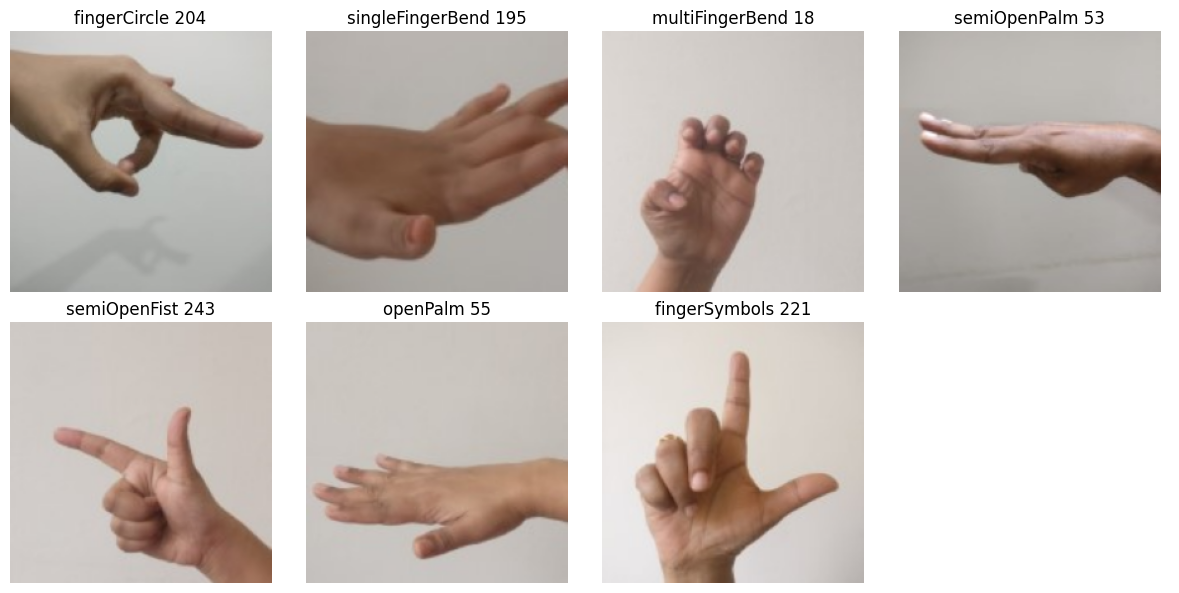

In [25]:
fig, axes = plt.subplots(2, 4, figsize=(12, 6))
temp = images.keys()
for i, ax in enumerate(axes.flat):
  if i < len(loaded_image):
    idx = np.random.randint(0,len(loaded_image[labels[i]]))
    ax.set_title(f'{labels[i]} {idx}')
    ax.imshow(loaded_image[labels[i]][idx])


  ax.axis('off') # Hide remaining axes if less than 10 images

plt.tight_layout()  # Adjust subplot parameters for a tight layout
plt.show()

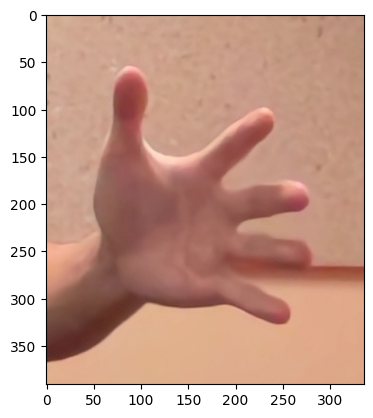

In [26]:
img = cv2.imread(os.path.join(source_dir2,'rps_data_sample','/kaggle/input/rps-data-sample/rps_data_sample/paper/103.jpg'),cv2.IMREAD_COLOR_RGB)
plt.imshow(img)

In [27]:
for label in labels2:
    loaded_image[label] = []

In [28]:
for label in labels2:
    for img_path in images[label]:
        img = cv2.imread(os.path.join(source_dir2,'rps_data_sample',label,img_path),cv2.IMREAD_COLOR_RGB)
        # print(img_path)
        height,weight,_ = img.shape    #Cropping
        if (height,weight) != (207,207):
            if height != weight:
                crop_height = min(height,weight)
                crop_width = min(height,weight)
                start_row = height // 2 - crop_height // 2
                start_col = weight // 2 - crop_width // 2
                cropped_img = img[start_row:start_row + crop_height, start_col:start_col + crop_width]
                img = cv2.resize(cropped_img,(207,207))
            else:
                img = cv2.resize(img,(207,207))
        loaded_image[label].append(img)

In [29]:
print(loaded_image.keys())

dict_keys(['fingerCircle', 'singleFingerBend', 'multiFingerBend', 'semiOpenPalm', 'semiOpenFist', 'openPalm', 'fingerSymbols', 'paper', 'rock', 'scissors'])


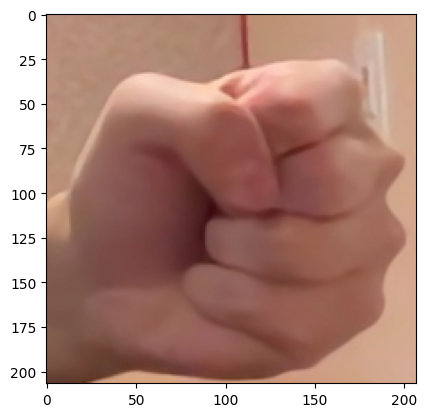

In [30]:
img = loaded_image['rock'][5]
plt.imshow(img)

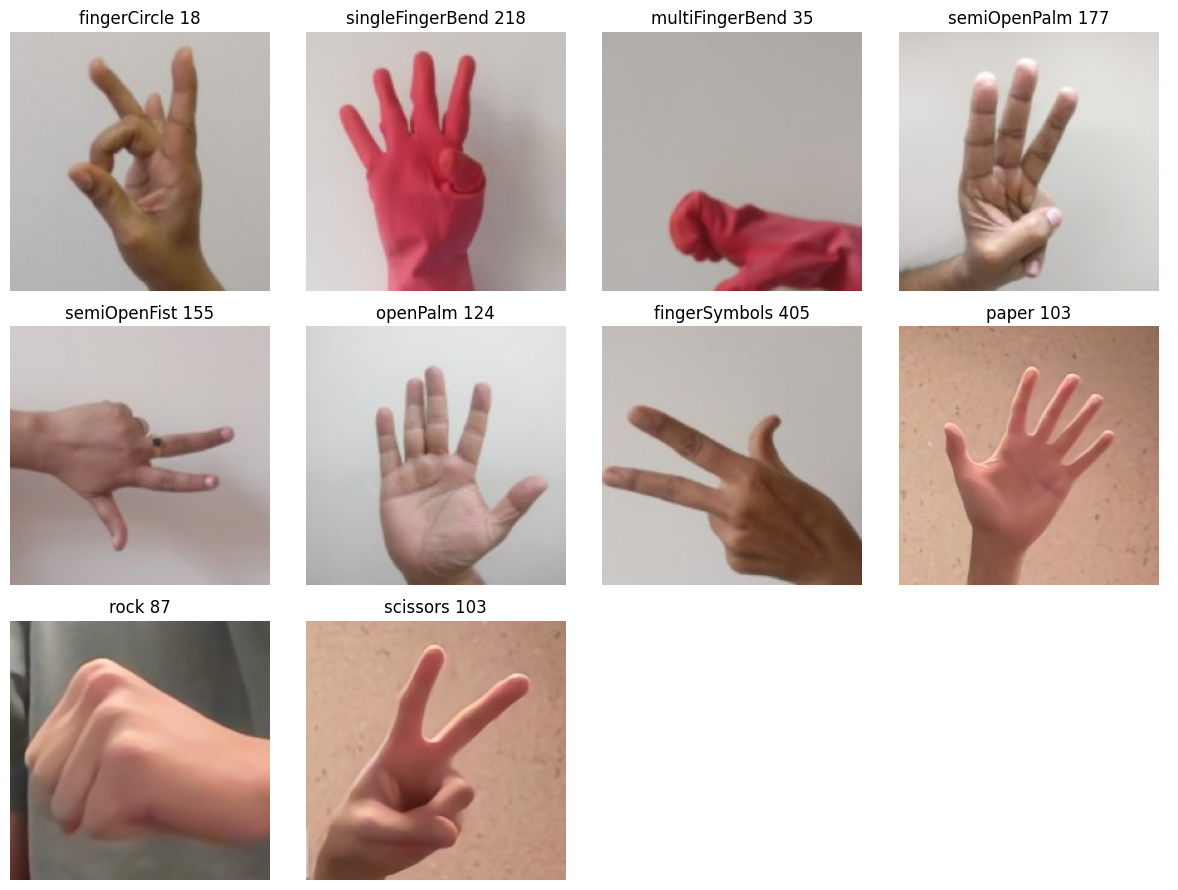

In [31]:
fig, axes = plt.subplots(3, 4, figsize=(12, 9))
temp = list(images.keys())
for i, ax in enumerate(axes.flat):
  if i < len(loaded_image):
    idx = np.random.randint(0,len(loaded_image[temp[i]]))
    ax.set_title(f'{temp[i]} {idx}')
    ax.imshow(loaded_image[temp[i]][idx])


  ax.axis('off') # Hide remaining axes if less than 10 images

plt.tight_layout()  # Adjust subplot parameters for a tight layout
plt.show()

In [32]:
print(temp)

['fingerCircle', 'singleFingerBend', 'multiFingerBend', 'semiOpenPalm', 'semiOpenFist', 'openPalm', 'fingerSymbols', 'paper', 'rock', 'scissors']


In [33]:
# !pip install albumentations


In [34]:
# def occlusion(img):
    
#     def overlay_mask(image):
#         img = image.copy()
#         h, w = img.shape[:2]
    
#         # Centers within the middle half of the image
#         center = (np.random.randint(w // 4, 3 * w // 4), np.random.randint(h // 4, 3 * h // 4))
        
#         # Axes sizes scaled down for 207x207 images
#         axes = (np.random.randint(10, 30), np.random.randint(10, 30))
        
#         angle = np.random.randint(0, 360)
        
#         # Black ellipse as mask
#         cv2.ellipse(img, center, axes, angle, 0, 360, (0, 0, 0), -1)
#         return img
    
#     # Define your augmentation pipeline with adjusted patch sizes
#     transform = A.Compose([
#         # CoarseDropout with patch sizes scaled for 207x207 images
#         A.CoarseDropout(
#             max_holes=2,
#             max_height=15,  # smaller max height
#             max_width=15,   # smaller max width
#             min_holes=1,
#             min_height=5,  # smaller min height
#             min_width=5,   # smaller min width
#             fill_value=0,
#             p=0.7
#         ),
    
#         # Gaussian blur (same as before)
#         A.GaussianBlur(blur_limit=(3, 7), p=0.5),
    
#         # Synthetic mask overlay
#         A.Lambda(image=lambda img, **kwargs: overlay_mask(img), p=0.3)
#     ])
    
#     # # Load an example image
#     # image = cv2.imread(img_path)  # Replace with your image path
#     # image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)  # Convert to RGB for visualization
    
#     # # Make sure image size matches 207x207 or resize it
#     # if image.shape[0] != 207 or image.shape[1] != 207:
#     #     image = cv2.resize(image, (207, 207))
    
#     # Apply augmentation
#     augmented = transform(image=img)
#     augmented_image = augmented['image']
    
#     return augmented_image

In [35]:
# def occlusion(img):
#     def overlay_mask(image):
#         img = image.copy()
#         h, w = img.shape[:2]
    
#         center = (np.random.randint(w // 4, 3 * w // 4), np.random.randint(h // 4, 3 * h // 4))
#         axes = (np.random.randint(10, 30), np.random.randint(10, 30))
#         angle = np.random.randint(0, 360)
        
#         if random.random() < 0.5:
#             # Random color fill ellipse
#             color = tuple(np.random.randint(0, 256, size=3).tolist())
#             cv2.ellipse(img, center, axes, angle, 0, 360, color, -1)
#         else:
#             # Noise-filled ellipse
#             mask = np.zeros_like(img, dtype=np.uint8)
#             cv2.ellipse(mask, center, axes, angle, 0, 360, (255,255,255), -1)
#             noise_patch = np.random.randint(0, 256, img.shape, dtype=np.uint8)
#             noise_masked = cv2.bitwise_and(noise_patch, mask)
#             inv_mask = cv2.bitwise_not(mask)
#             background = cv2.bitwise_and(img, inv_mask)
#             img = cv2.add(background, noise_masked)
            
#         return img
    
#     transform = A.Compose([
#         A.CoarseDropout(
#             max_holes=2,
#             max_height=15,
#             max_width=15,
#             min_holes=1,
#             min_height=5,
#             min_width=5,
#             fill_value=0,
#             p=0.7
#         ),
#         A.GaussianBlur(blur_limit=1, p=0.3),
#         A.Lambda(image=lambda img, **kwargs: overlay_mask(img), p=0.3)
#     ])
    
#     augmented = transform(image=img)
#     return augmented['image']

In [36]:
def overlay_mask(image):
    img = image.copy()
    h, w = img.shape[:2]

    # Ellipse centered near middle
    center = (
        np.random.randint(w // 4, 3 * w // 4),
        np.random.randint(h // 4, 3 * h // 4)
    )
    axes = (
        np.random.randint(10, 30),
        np.random.randint(10, 30)
    )
    angle = np.random.randint(0, 360)

    if random.random() < 0.5:
        # Filled ellipse with random color
        color = tuple(np.random.randint(0, 256, size=3).tolist())
        cv2.ellipse(img, center, axes, angle, 0, 360, color, -1)
    else:
        # Noise-filled ellipse
        mask = np.zeros_like(img, dtype=np.uint8)
        cv2.ellipse(mask, center, axes, angle, 0, 360, (255, 255, 255), -1)
        noise_patch = np.random.randint(0, 256, img.shape, dtype=np.uint8)
        noise_masked = cv2.bitwise_and(noise_patch, mask)
        inv_mask = cv2.bitwise_not(mask)
        background = cv2.bitwise_and(img, inv_mask)
        img = cv2.add(background, noise_masked)

    return img

def occlusion(img):
    h, w = img.shape[:2]

    # Ensure rectangle is also centered
    def centered_coarse_dropout(img):
        img = img.copy()
        cx = np.random.randint(w // 4, 3 * w // 4)
        cy = np.random.randint(h // 4, 3 * h // 4)
        dw = np.random.randint(10, 30)
        dh = np.random.randint(10, 30)

        x1 = max(0, cx - dw // 2)
        y1 = max(0, cy - dh // 2)
        x2 = min(w, cx + dw // 2)
        y2 = min(h, cy + dh // 2)

        img[y1:y2, x1:x2] = 0  # black rectangle
        return img

    transform = A.Compose([
        A.OneOf([
            A.Lambda(image=lambda img, **kwargs: overlay_mask(img)),
            A.Lambda(image=lambda img, **kwargs: centered_coarse_dropout(img)),
        ], p=1.0)
    ])

    augmented = transform(image=img)
    return augmented['image']

In [37]:
o_img = occlusion(img)

/tmp/ipykernel_35/1278627115.py:53: UserWarning: Using lambda is incompatible with multiprocessing. Consider using regular functions or partial().
  A.Lambda(image=lambda img, **kwargs: overlay_mask(img)),
/tmp/ipykernel_35/1278627115.py:54: UserWarning: Using lambda is incompatible with multiprocessing. Consider using regular functions or partial().
  A.Lambda(image=lambda img, **kwargs: centered_coarse_dropout(img)),


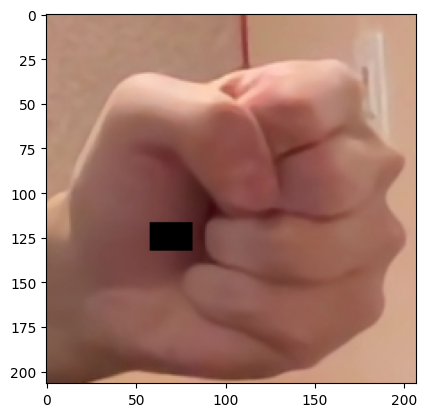

In [38]:
plt.imshow(o_img)

(array([1152.,    0.,    0.,    9.,   10.,   22.,   17.,   29.,   28.,
          65.,  104.,  127.,  226.,  167.,  211.,  152.,  264.,  232.,
         592.,  462.,  763.,  830.,  655., 1253., 1073., 1908., 1506.,
        3028., 2159., 4102., 4045., 2498., 3780., 2469., 3699., 2345.,
        3474., 2235., 2657., 1263., 1444., 1425.,  947., 1644., 1309.,
        2131., 1927., 3611., 2208., 2668., 2347., 1777., 2508., 1956.,
        4439., 2970., 4703., 2364., 2699., 1704., 2245., 1292.,  904.,
        1529., 1103., 2669., 1173., 1556., 1100., 1900., 1868., 1077.,
        1542.,  780.,  904.,  517.,  729.,  363.,  587.,  280., 1300.,
        1811., 1183., 1347.,  217.,  242.,  124.,  158.,  106.,  122.,
         110.,   94.,  114.,  102.,  208.,  143.,  184.,  151.,  151.,
         170.]),
 array([  0.  ,   2.55,   5.1 ,   7.65,  10.2 ,  12.75,  15.3 ,  17.85,
         20.4 ,  22.95,  25.5 ,  28.05,  30.6 ,  33.15,  35.7 ,  38.25,
         40.8 ,  43.35,  45.9 ,  48.45,  51.  ,  53.55,  5

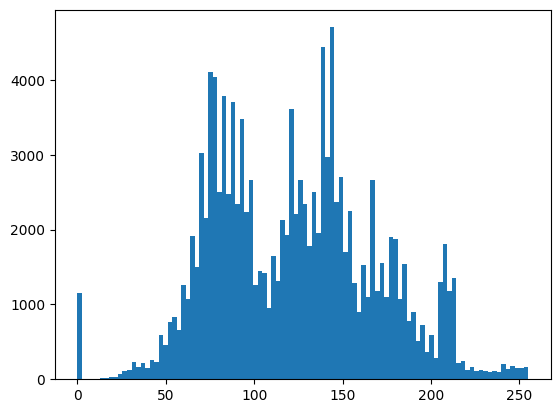

In [39]:
plt.hist(o_img.ravel(), bins=100)

In [40]:
print("Data type:", o_img.dtype)
print("Min:", np.min(o_img))
print("Max:", np.max(o_img))

Data type: uint8
Min: 0
Max: 255


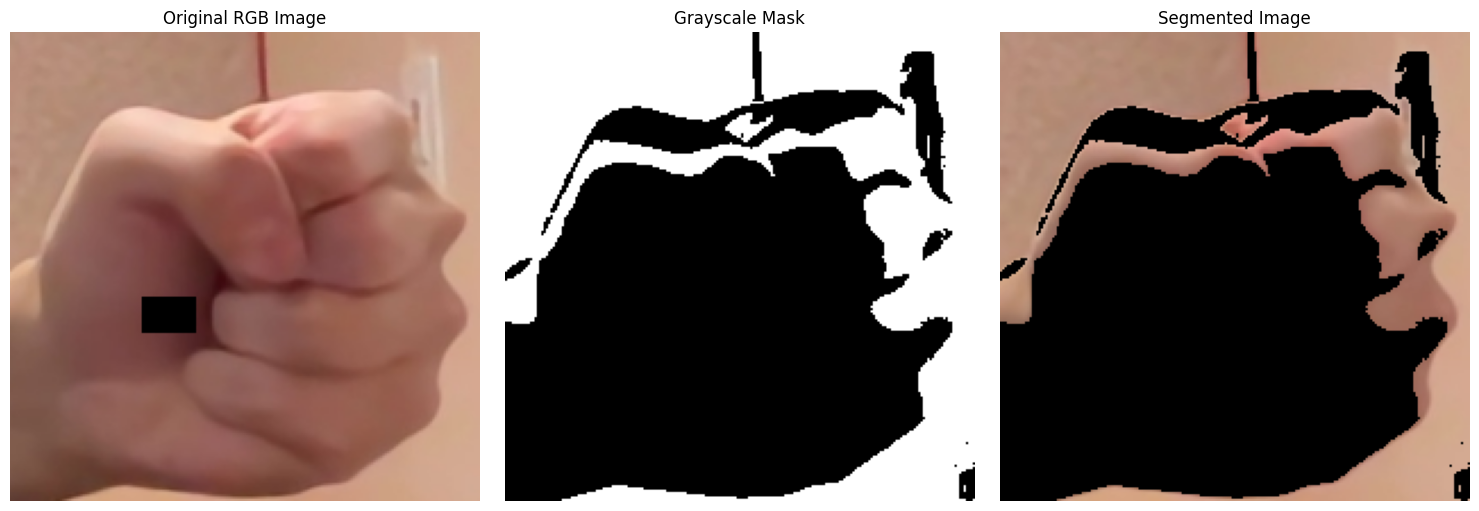

In [41]:
gray = cv2.cvtColor(o_img, cv2.COLOR_RGB2GRAY)

# Set threshold values (tune these based on your image brightness)
lower = 120
upper = 180

# Create binary mask
mask = cv2.inRange(gray, lower, upper)

# Apply mask to original RGB image
segmented = cv2.bitwise_and(o_img, o_img, mask=mask)

# Display results
plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
plt.title("Original RGB Image")
plt.imshow(o_img)
plt.axis("off")

plt.subplot(1, 3, 2)
plt.title("Grayscale Mask")
plt.imshow(mask, cmap='gray')
plt.axis("off")

plt.subplot(1, 3, 3)
plt.title("Segmented Image")
plt.imshow(segmented)
plt.axis("off")

plt.tight_layout()
plt.show()

In [42]:
# !pip install mediapipe


In [43]:
# !pip install torch torchvision timm transformers opencv-python matplotlib


In [44]:
# fig, axes = plt.subplots(4, 4, figsize=(12, 6))
# temp = images.keys()



# for ax in axes.flat:
#     idx = np.random.randint(0,len(loaded_image[labels[i]]))
#     img = loaded_image[labels[i]][idx]
#     aug_img = occlusion(img)
#     ax.set_title(f'{labels[i]} {idx}')
#     ax.imshow(img)
#     ax.set_title(f'{labels[i]} {idx}')
#     ax.imshow(img)
    


#     ax.axis('off') # Hide remaining axes if less than 10 images

# plt.tight_layout()  # Adjust subplot parameters for a tight layout
# plt.show()

In [45]:
# !pip install git+https://github.com/facebookresearch/segment-anything.git
# !pip install opencv-python matplotlib
# !pip install torch torchvision

In [46]:
from segment_anything import sam_model_registry, SamPredictor

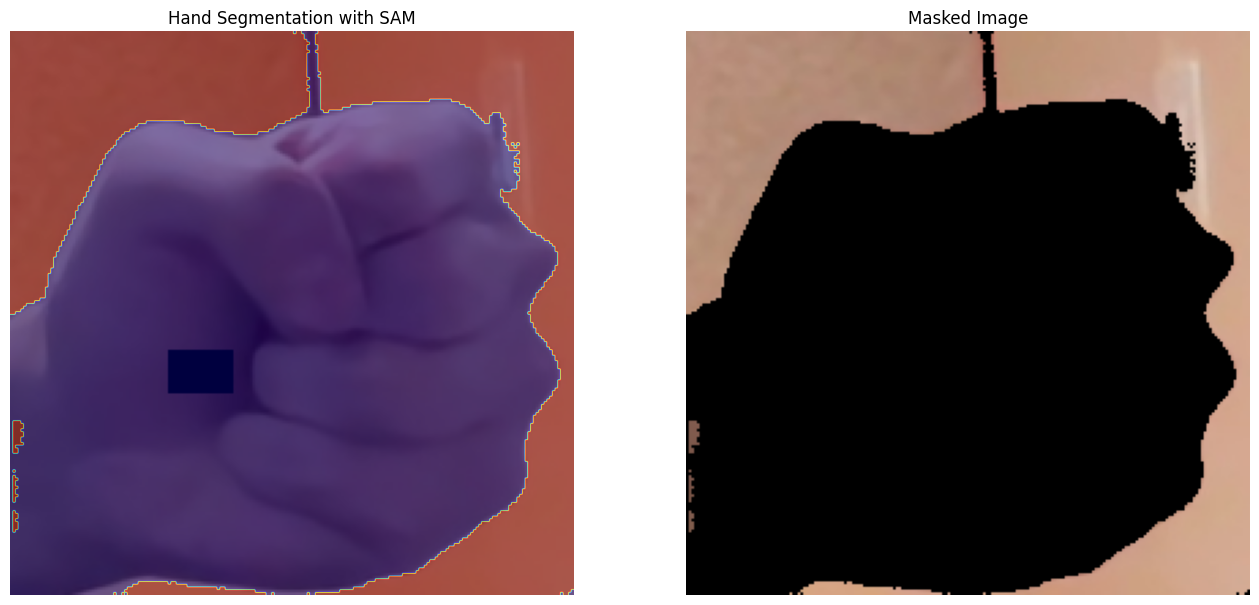

In [47]:


# Step 1: Load the image
# image_path = "your_image.jpg"
# image = cv2.imread(image_path)
image = o_img



# Step 2: Load the SAM model
sam_checkpoint = "/kaggle/input/sam_vit_b_01ec64/pytorch/default/1/sam_vit_b_01ec64.pth"
model_type = "vit_b"

sam = sam_model_registry[model_type](checkpoint=sam_checkpoint)
sam.to("cuda" if torch.cuda.is_available() else "cpu")

# Step 3: Create a predictor
predictor = SamPredictor(sam)
predictor.set_image(image)

# Step 4: Define a bounding box manually (e.g., rough hand location)
# You can also use hand detector to get this automatically
bbox = [0, 0, 207, 207]  # x_min, y_min, x_max, y_max


# Step 5: Predict the mask
masks, scores, logits = predictor.predict(box=np.array(bbox), multimask_output=True)

# Step 6: Select best mask
best_mask = masks[np.argmax(scores)]

plt.figure(figsize=(16, 8))

# Left: Image with overlayed mask
plt.subplot(1, 2, 1)
plt.imshow(image)
plt.imshow(best_mask, alpha=0.5, cmap='jet')
plt.title("Hand Segmentation with SAM")
plt.axis('off')

# Right: Mask applied on the image
masked_image = cv2.bitwise_and(image, image, mask=(best_mask * 255).astype(np.uint8))
plt.subplot(1, 2, 2)
plt.imshow(masked_image)
plt.title("Masked Image")
plt.axis('off')

plt.show()

In [48]:
sam_checkpoint = "/kaggle/input/sam_vit_b_01ec64/pytorch/default/1/sam_vit_b_01ec64.pth"
model_type = "vit_b"
device = "cuda" if torch.cuda.is_available() else "cpu"

sam = sam_model_registry[model_type](checkpoint=sam_checkpoint)
sam.to(device)
sam.eval()

def segment_hand_with_sam(image):
    predictor = SamPredictor(sam)
    predictor.set_image(image)
    
    h, w = image.shape[:2]
    bbox = [0, 0, w, h]  # full image bounding box
    
    masks, scores, logits = predictor.predict(box=np.array(bbox), multimask_output=True)
    best_mask = masks[np.argmax(scores)]
    
    # # Visualization
    # plt.figure(figsize=(16, 8))

    # plt.subplot(1, 2, 1)
    # plt.imshow(image)
    # plt.imshow(best_mask, alpha=0.5, cmap='jet')
    # plt.title("Hand Segmentation with SAM")
    # plt.axis('off')

    # masked_image = cv2.bitwise_and(image, image, mask=(best_mask * 255).astype(np.uint8))
    # plt.subplot(1, 2, 2)
    # plt.imshow(masked_image)
    # plt.title("Masked Image")
    # plt.axis('off')

    # plt.show()
    
    return best_mask

In [49]:
segment_hand_with_sam(o_img)

array([[ True,  True,  True, ...,  True,  True,  True],
       [ True,  True,  True, ...,  True,  True,  True],
       [ True,  True,  True, ...,  True,  True,  True],
       ...,
       [False, False, False, ...,  True,  True,  True],
       [False, False, False, ...,  True,  True, False],
       [False, False, False, ...,  True, False, False]])

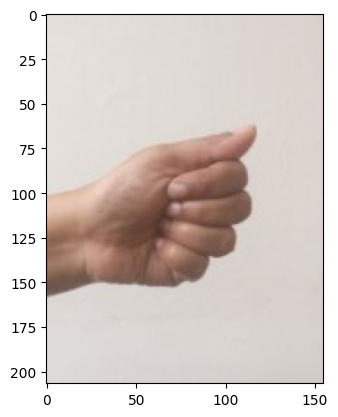

In [50]:
plt.imshow(img2)

/tmp/ipykernel_35/1278627115.py:53: UserWarning: Using lambda is incompatible with multiprocessing. Consider using regular functions or partial().
  A.Lambda(image=lambda img, **kwargs: overlay_mask(img)),
/tmp/ipykernel_35/1278627115.py:54: UserWarning: Using lambda is incompatible with multiprocessing. Consider using regular functions or partial().
  A.Lambda(image=lambda img, **kwargs: centered_coarse_dropout(img)),


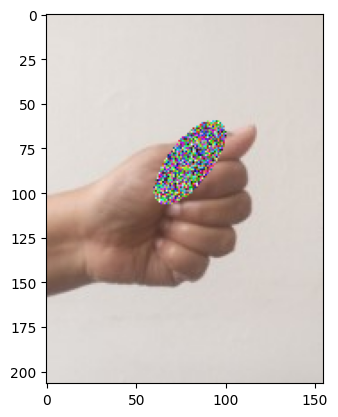

In [51]:
o_img2 = occlusion(img2)
plt.imshow(o_img2)

In [52]:
mask = segment_hand_with_sam(o_img2)

In [53]:
mask.shape

(207, 155)

In [54]:
o_img2.dtype

dtype('uint8')

In [55]:
mask.dtype

dtype('bool')

In [56]:
def preprocess_semantic_segmentation(mask):
    """
    Prepares the semantic segmentation mask:
    - Converts grayscale mask into categorical values.
    - Expands dimensions to match RGB channels.
    """
    mask = mask.astype(np.float32)  # Ensure it's float
    mask = np.expand_dims(mask, axis=-1)  # Convert (512, 512) → (512, 512, 1)
    return mask


In [57]:
def preprocess_mask_for_input(mask):
    """
    Prepares a boolean or uint8 mask for concatenation with an RGB image.
    - Converts to float32 and scales to 0–1.
    - Expands dimensions to (H, W, 1) if needed.
    """
    if mask.dtype != np.float32:
        mask = mask.astype(np.float32)

    # Normalize mask (optional, if needed by model)
    if mask.max() > 1.0:
        mask /= 255.0

    # Ensure 3D shape
    if mask.ndim == 2:
        mask = np.expand_dims(mask, axis=-1)

    return mask


In [58]:
# image = image.astype(np.float32) / 255.0  # Normalize RGB image
# mask = preprocess_mask_for_input(mask)

# input_tensor = np.concatenate([image, mask], axis=-1)  # Shape: (H, W, 4)


ValueError: all the input array dimensions except for the concatenation axis must match exactly, but along dimension 1, the array at index 0 has size 207 and the array at index 1 has size 155

In [ ]:
# if o_img2.dtype == np.float32:
#     print("Image is already float32.")
# else:
#     print(f"Image is {image.dtype}, converting to float32.")


In [59]:
import os
import cv2
import numpy as np

def save_image_and_mask(image, image_name, output_dir="/kaggle/working/processed", segment_fn=None):
    """
    Saves the original image and corresponding segmentation mask using SAM
    in separate 'images' and 'masks' subfolders.

    Parameters:
    - image: np.ndarray (input image)
    - image_name: str (filename without extension)
    - output_dir: str (base path to save results)
    - segment_fn: function that takes image and returns a mask (e.g., segment_hand_with_sam)
    """
    if segment_fn is None:
        raise ValueError("You must provide a segmentation function like segment_hand_with_sam")

    # Create separate folders for images and masks
    images_dir = os.path.join(output_dir, "images")
    masks_dir = os.path.join(output_dir, "masks")
    os.makedirs(images_dir, exist_ok=True)
    os.makedirs(masks_dir, exist_ok=True)

    # Segment the image
    mask = segment_fn(image)

    # Ensure mask is in uint8 format for saving
    if mask.dtype != np.uint8:
        mask = (mask * 255).astype(np.uint8)

    # Construct full paths
    img_path = os.path.join(images_dir, f"{image_name}.png")
    mask_path = os.path.join(masks_dir, f"{image_name}_mask.png")

    # Save image and mask
    cv2.imwrite(img_path, cv2.cvtColor(image, cv2.COLOR_RGB2BGR))  # Convert RGB to BGR for OpenCV
    cv2.imwrite(mask_path, mask)

    print(f"[✓] Saved image to {img_path}")
    print(f"[✓] Saved mask to {mask_path}")


In [60]:
for label in loaded_image:
    for i, image in enumerate(loaded_image[label]):
        output_dir = f"/kaggle/working/mask_processed3/{label}"
        save_image_and_mask(image, f"{label}{i}", output_dir=output_dir, segment_fn=segment_hand_with_sam)


[✓] Saved image to /kaggle/working/mask_processed3/fingerCircle/images/fingerCircle0.png
[✓] Saved mask to /kaggle/working/mask_processed3/fingerCircle/masks/fingerCircle0_mask.png
[✓] Saved image to /kaggle/working/mask_processed3/fingerCircle/images/fingerCircle1.png
[✓] Saved mask to /kaggle/working/mask_processed3/fingerCircle/masks/fingerCircle1_mask.png
[✓] Saved image to /kaggle/working/mask_processed3/fingerCircle/images/fingerCircle2.png
[✓] Saved mask to /kaggle/working/mask_processed3/fingerCircle/masks/fingerCircle2_mask.png
[✓] Saved image to /kaggle/working/mask_processed3/fingerCircle/images/fingerCircle3.png
[✓] Saved mask to /kaggle/working/mask_processed3/fingerCircle/masks/fingerCircle3_mask.png
[✓] Saved image to /kaggle/working/mask_processed3/fingerCircle/images/fingerCircle4.png
[✓] Saved mask to /kaggle/working/mask_processed3/fingerCircle/masks/fingerCircle4_mask.png
[✓] Saved image to /kaggle/working/mask_processed3/fingerCircle/images/fingerCircle5.png
[✓] Sa

In [61]:
occluded = {}
for label in loaded_image.keys():
    occluded[label] = []

/tmp/ipykernel_35/1278627115.py:53: UserWarning: Using lambda is incompatible with multiprocessing. Consider using regular functions or partial().
  A.Lambda(image=lambda img, **kwargs: overlay_mask(img)),
/tmp/ipykernel_35/1278627115.py:54: UserWarning: Using lambda is incompatible with multiprocessing. Consider using regular functions or partial().
  A.Lambda(image=lambda img, **kwargs: centered_coarse_dropout(img)),


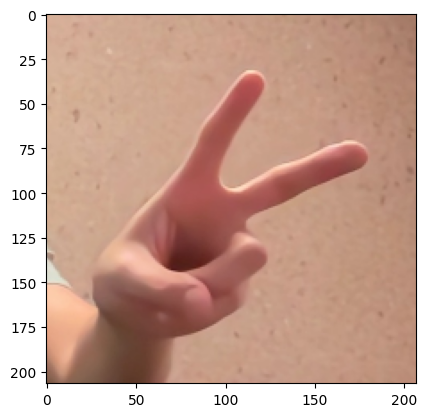

In [62]:
for label in occluded:
    for image in loaded_image[label]:
        plt.imshow(image)
        o_img = occlusion(image)
        occluded[label].append(o_img)

In [63]:
for label in occluded:
    # start = len(os.listdir(f"/kaggle/working/mask_processed2/images/{label}"))
    for i,image in enumerate(occluded[label]):
        save_image_and_mask(image, f'{label}{i}', output_dir=f"/kaggle/working/mask_processed2/{label}" , segment_fn=segment_hand_with_sam)

[✓] Saved image to /kaggle/working/mask_processed2/fingerCircle/images/fingerCircle0.png
[✓] Saved mask to /kaggle/working/mask_processed2/fingerCircle/masks/fingerCircle0_mask.png
[✓] Saved image to /kaggle/working/mask_processed2/fingerCircle/images/fingerCircle1.png
[✓] Saved mask to /kaggle/working/mask_processed2/fingerCircle/masks/fingerCircle1_mask.png
[✓] Saved image to /kaggle/working/mask_processed2/fingerCircle/images/fingerCircle2.png
[✓] Saved mask to /kaggle/working/mask_processed2/fingerCircle/masks/fingerCircle2_mask.png
[✓] Saved image to /kaggle/working/mask_processed2/fingerCircle/images/fingerCircle3.png
[✓] Saved mask to /kaggle/working/mask_processed2/fingerCircle/masks/fingerCircle3_mask.png
[✓] Saved image to /kaggle/working/mask_processed2/fingerCircle/images/fingerCircle4.png
[✓] Saved mask to /kaggle/working/mask_processed2/fingerCircle/masks/fingerCircle4_mask.png
[✓] Saved image to /kaggle/working/mask_processed2/fingerCircle/images/fingerCircle5.png
[✓] Sa

In [64]:
print(os.listdir('/kaggle/working/'))

['.virtual_documents', 'mask_processed3', 'mask_processed2']


In [65]:
import shutil

shutil.make_archive("/kaggle/working/mask_processed2", 'zip', "/kaggle/working/mask_processed2")
shutil.make_archive("/kaggle/working/mask_processed3", 'zip', "/kaggle/working/mask_processed3")


'/kaggle/working/mask_processed3.zip'